In [1]:
from imutils import face_utils
import numpy as np
import imutils
import dlib
import cv2
import matplotlib.pyplot as plt
import matplotlib as mpl
from skimage.feature import hog
import os
import urllib.request

In [2]:
def rect_to_bb(rect):
    x = rect.left()
    y = rect.top()
    w = rect.right() - x
    h = rect.bottom() - y
    return (x, y, w, h)

def shape_to_np(shape, dtype="int"):
    coords = np.zeros((68, 2), dtype=dtype)
    for i in range(0, 68):
        coords[i] = (shape.part(i).x, shape.part(i).y)
    return coords

In [3]:
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('/Users/elliott/Downloads/shape_predictor_68_face_landmarks.dat')

In [4]:
image = cv2.imread('/Users/elliott/Downloads/IMG_3701.jpg')
rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = imutils.resize(image, width=500)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
rects = detector(gray, 1)

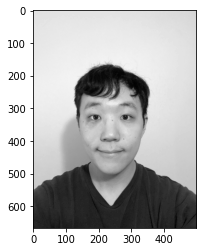

In [18]:
plt.imshow(gray, cmap = "gray")
plt.show()

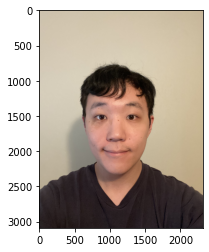

In [5]:
plt.imshow(rgb_image)
plt.show()

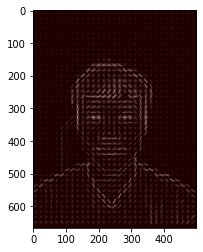

In [6]:
hog_features, hog_image = hog(image,
                              visualize=True,
                              block_norm='L2-Hys',
                              pixels_per_cell=(16, 16))

plt.imshow(hog_image, cmap=mpl.cm.pink)

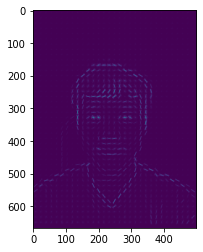

In [7]:
plt.imshow(hog_image)

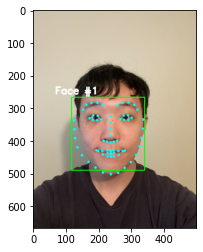

In [8]:
rgb_image_copy = rgb_image.copy()
rgb_image_copy = imutils.resize(rgb_image_copy, width=500)

for (i, rect) in enumerate(rects):
    shape = predictor(gray, rect)
    shape = face_utils.shape_to_np(shape)
    (x, y, w, h) = face_utils.rect_to_bb(rect)
    cv2.rectangle(rgb_image_copy, (x, y), (x + w, y + h), (0, 255, 0), 2)
    cv2.putText(rgb_image_copy, "Face #{}".format(i + 1), (x - 50, y - 10),
        cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 4)
    for (x, y) in shape:
        cv2.circle(rgb_image_copy, (x, y), 4, (0, 255, 255), -1)
        
plt.imshow(rgb_image_copy)
plt.show()

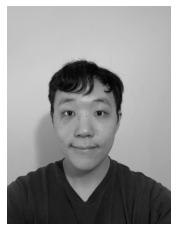

In [9]:
image_template = rgb_image.copy()

image_gray = cv2.cvtColor(rgb_image, cv2.COLOR_BGR2GRAY)

plt.axis("off")
plt.imshow(image_gray, cmap = "gray")

File exists
Faces:
 [[ 501 1092 1162 1162]]


Text(0.5, 1.0, 'Face Detection')

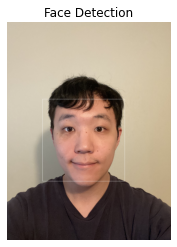

In [10]:
haarcascade_url = "https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_alt2.xml"

haarcascade = "haarcascade_frontalface_alt2.xml"

if (haarcascade in os.listdir(os.curdir)):
    print("File exists")
else:
    urlreq.urlretrieve(haarcascade_url, haarcascade)
    print("File downloaded")

detector = cv2.CascadeClassifier(haarcascade)

faces = detector.detectMultiScale(image_gray)

print("Faces:\n", faces)

for face in faces:
    (x,y,w,d) = face
    cv2.rectangle(image_template,(x,y),(x+w, y+d),(255, 255, 255), 2)

plt.axis("off")
plt.imshow(image_template)
plt.title('Face Detection')